In [431]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file_name = "sequentiality_hfull.csv"

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [432]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

In [433]:
df_1 = pd.read_csv(file_name)

In [434]:
df_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,c_value,topic_output,contextual
0,0,0,0,0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,...,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103...."
1,1,1,1,2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,...,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122..."
2,2,2,2,4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,...,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19...."
3,3,3,3,6,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,...,3018Q3ZVOJCZJFDMPSFXATCQG1OARN,1.0,"I've been on road trips before, but never to A...","Play stupid games, win stupid prizes road trip...",2.0,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65...."
4,4,4,4,8,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,...,304SM51WA4QG34IRAVFYVE1S8XNSBV,4.0,I really enjoy going to the zoo with friends a...,I wanted to write about one of the best days i...,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2..."


In [435]:
df_1 = df_1.rename(columns={'c_value': 'sequentiality'})

In [436]:
nlp = en_core_web_sm.load()

In [437]:
len(df_1['story'])

6854

In [438]:
df_1['ner_count'] = [0]*len(df_1['story'])

In [439]:
for i in range(len(df_1['story'])):
    story = df_1['story'][i]
    ner = nlp(story)
    ner_count = len(ner.ents)
    df_1.loc[i, 'ner_count'] = ner_count

In [441]:
# doc_1 = nlp(st_1)
# print([(X.text, X.label_) for X in doc_1.ents])

In [442]:
df_1['type'] = [0]*len(df_1['story'])

In [443]:
for i in range(len(df_1['story'])):
    if df_1['memType'][i] == 'retold':
        df_1.loc[i, 'type'] = 2
    elif  df_1['memType'][i] == 'recalled':
        df_1.loc[i, 'type'] = 1
    else:
        df_1.loc[i, 'type'] = 0

In [444]:
df_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,similarityReason,story,stressful,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type
0,0,0,0,0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,...,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0
1,1,1,1,2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,...,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0
2,2,2,2,4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,...,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0
3,3,3,3,6,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,...,"I've been on road trips before, but never to A...","Play stupid games, win stupid prizes road trip...",2.0,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0
4,4,4,4,8,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,...,I really enjoy going to the zoo with friends a...,I wanted to write about one of the best days i...,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0


In [445]:
df_tr = df_1.iloc[1320:]

In [446]:
df_tr.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,similarityReason,story,stressful,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type
1320,1320,120,1320,3227,33JKGHPFYDGF6IUJTOOLA02HOQTNMS,1151,ZU5RR2RC,55.0,woman,white,...,Because I love my child very much and I would ...,My child broke up with their romantic partner ...,4.0,A distant relationship with my only child seem...,90.0,0.082065,"[-52.10887866886648, -41.804224842997314, -84....","[-52.10887866886648, -40.769281010718174, -80....",0,0
1321,1321,121,1321,3229,30OG32W0SVXHUU26CQ02XSX7PDUEN8,1265,IBZG634Z,35.0,woman,other,...,I adore family vacations. I love the times my ...,So my family and I went to Disney World for th...,1.0,Our first family trip to Walt Disney World was...,21.0,0.080053,"[-94.6249753777093, -82.48795960253327, -34.04...","[-94.6249753777093, -78.17110984444611, -31.32...",11,0
1322,1322,122,1322,3232,3ZDAD0O1T2ZOV7Y74RC6UGO6VOFXT0,6994,B2U9VEFQ,25.0,man,white,...,I enjoy nature and animals,Every saturday i tend my garden. I started put...,1.0,A warm summer morning with a Humming Bird. How...,30.0,0.100385,"[-66.80261022717143, -95.58443974288728, -116....","[-66.80261022717143, -92.26169934155759, -107....",5,0
1323,1323,123,1323,3235,37W3JXSD67U5NTSB4S3J0E2ER88WY6,1262,Z1M8KGJ0,35.0,man,white,...,"I've never invested money in a money market, a...","Two weeks ago, I lost a huge amount of money i...",2.0,I lost a huge amount of money in the market ma...,14.0,0.088101,"[-47.18402000106619, -79.55701163399826, -92.2...","[-47.18402000106619, -79.58703359171257, -87.7...",13,0
1324,1324,124,1324,3236,3IJXV6UZ1Y5EPXWK1G7ARR0A7MYRIJ,1403,JG5I114K,40.0,man,white,...,I am an active investor and theoretically woul...,A couple of weeks ago I lost a big pile. I h...,2.0,I lost a huge amount of money in the market ma...,14.0,0.014575,"[-52.273345872657835, -59.665581599535145, -75...","[-52.273345872657835, -60.17005541699902, -66....",11,0


In [447]:
df_tr = df_tr.sample(frac=1).reset_index(drop=True)
df_tr.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,similarityReason,story,stressful,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type
0,3666,110,910,2310,3DI28L7YXB0EGNVH73240LK4L491EQ,2619,S8R8FQNO,25.0,woman,other,...,NaN,My memorable event that happened to me was hav...,1.0,"I visited Auckland, New Zealand and Sydney, Au...",1.400000e+01,0.033908,"[-113.88703283545908, -100.34008221619925, -85...","[-113.88703283545908, -97.62191329295348, -81....",29,1
1,3948,192,1192,3027,3HMIGG0U4MSUXSWT6PNDMYZSJ3V8Y7,1268,C7QGQF93,30.0,woman,white,...,NaN,"I bought my first house earlier this year, tow...",2.0,I bought my first house earlier this year. It ...,1.200000e+02,0.077793,"[-77.64076014055847, -38.449340307228525, -159...","[-77.64076014055847, -32.35843086043764, -157....",11,1
2,3124,168,368,943,354P56DE9LPT1SF1XE3IQCFWQB27S3,629,M8QM50UR,30.0,man,white,...,NaN,"On May 27, my wife gave birth to our first chi...",1.0,"My wife gave birth to our first child, a baby ...",3.333333e+29,0.031784,"[-104.02680691415725, -55.70472379065704, -172...","[-104.02680691415725, -55.09245583620564, -172...",3,1
3,3636,80,880,2234,3CTOC39K38C02PWBAKU4YBO9NI17J8,2939,K19X65S1,40.0,woman,black,...,NaN,In May of 2019 I decided it was the right time...,2.0,A trip to Vegas to visit my mom that is recove...,6.000000e+01,0.043312,"[-142.20060375031838, -86.9401103564144, -78.0...","[-142.20060375031838, -77.31633622762087, -78....",14,1
4,2811,55,55,142,3137ONMDKHRBK2LKPMN778OAZ6REG4,3459,9RIAL0SY,30.0,man,asian,...,NaN,"About 2 months ago, one of our employees had a...",5.0,I helped out a co-worker who was going through...,6.000000e+01,0.035912,"[-80.14963676894227, -68.38427823768545, -161....","[-80.14963676894227, -67.07008723375596, -154....",7,1


In [448]:
from sklearn.model_selection import train_test_split
X = df_tr.loc[:, ["ner_count"]]
Y = df_tr.loc[:, ["type"]]

In [449]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [450]:
x_train.head()

,ner_count
500,19
726,1
3660,3
3051,14
4855,5


In [451]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0)
model.fit(x_train, y_train)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=0)

In [452]:
preds = model.predict(x_test)

In [453]:
yz = list(y_test['type'])

In [454]:
tot = len(yz)
acc = 0
for i in range(len(yz)):
    if preds[i] == yz[i]:
        acc += 1

print(acc/tot)

0.5121951219512195


In [455]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
preds_lr = logistic_regression.predict(x_test)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [456]:
accuracy = accuracy_score(y_test, preds_lr)

In [457]:
accuracy

0.5158084914182475

**VERB calc**

In [458]:
nlp = spacy.load("en_core_web_sm")

In [459]:
def most_frequent_verb(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract verbs and count their occurrences
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    verb_counts = Counter(verbs)

    # Find the most frequent verb
    most_common_verb, count = verb_counts.most_common(1)[0]

    return most_common_verb, count

In [460]:
# most_common_verb, count = most_frequent_verb(story_1)
# print(most_common_verb)
# print(count)

In [461]:
# most_common_verb, count = most_frequent_verb(story_2)
# print(most_common_verb)
# print(count)

In [462]:
df_1['common_verb'] = [""]*len(df_1['story'])

In [463]:
df_1['verb_count'] = [0]*len(df_1['story'])

In [464]:
for i in range(len(df_1['story'])):
    story = df_1['story'][i]
    most_common_verb, count = most_frequent_verb(story)
    # ner_count = len(ner.ents)
    df_1.loc[i, 'common_verb'] = most_common_verb
    df_1.loc[i, 'verb_count'] = count

In [465]:
df_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,stressful,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count
0,0,0,0,0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,...,1.0,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3
1,1,1,1,2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,...,1.0,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2
2,2,2,2,4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,...,4.0,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5
3,3,3,3,6,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,...,2.0,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4
4,4,4,4,8,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,...,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5


In [466]:
# df_1.to_csv('common_verb.csv', index=None)

In [467]:
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

def most_occurring_bigrams(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove punctuation
    words = [word for word in words if word.isalnum()]

    # Generate bigrams excluding those with a period
    bigrams = [(word1, word2) for word1, word2 in ngrams(words, 2) if '.' not in (word1, word2)]

    # Count the occurrences of each bigram
    bigram_counts = Counter(bigrams)

    # Find the most common bigrams
    most_common_bigrams = bigram_counts.most_common()

    return most_common_bigrams[:3]

In [468]:
# st = most_occurring_bigrams(story_1)
# st

In [469]:
df_1['common_bigram'] = [[] for _ in range(len(df_1['story']))]

In [470]:
for i in range(len(df_1['story'])):
    story = df_1['story'][i]
    most_common_bigrams = most_occurring_bigrams(story)
    # ner_count = len(ner.ents)
    df_1['common_bigram'][i].extend(most_common_bigrams)

In [471]:
df_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram
0,0,0,0,0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,...,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,..."
1,1,1,1,2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,...,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was..."
2,2,2,2,4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,...,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin..."
3,3,3,3,6,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,...,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),..."
4,4,4,4,8,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,...,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]"


In [472]:
#df_1.to_csv('common_verb.csv', index=None)

In [473]:
df_recall = df_1.iloc[2756:5535]
df_recall = df_recall.sample(frac=1).reset_index(drop=True)
df_recall.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram
0,4068,112,1312,3337,3IXEICO7935BCSEB343GU3BMWFR6TE,2854,JL70H7O8,35.0,man,native,...,After 20 years of service in the United States...,120.0,0.080476,"[-57.13224379035011, -80.84708973928656, -161....","[-57.13224379035011, -82.13463128885036, -157....",10,1,plan,2,"[((my, retirement), 3), ((to, do), 3), ((20, y..."
1,4359,3,1603,4069,3N2BF7Y2VRGNWM88QQT85G5K32RMH0,2742,J1K095ZB,35.0,man,white,...,A wonderful 4th of July party and a reunion wi...,14.0,0.066096,"[-87.03813782116204, -92.87915400666807, -78.6...","[-87.03813782116204, -89.77584643182847, -74.6...",7,1,celebrate,2,"[((for, a), 2), ((When, I), 2), ((high, school..."
2,3241,85,485,1237,37C0GNLMHGP4V3IEHE31PZT0VKRD6A,1397,EO60QHPB,55.0,man,white,...,After several years of very minimal communicat...,21.0,0.104926,"[-99.22721224704033, -136.69342954727654, -61....","[-99.22721224704033, -126.89638996825005, -55....",13,1,make,4,"[((weeks, for), 3), ((it, to), 3), ((the, stic..."
3,3154,198,398,1021,35GMH2SV3F3ZCF2ID50FCHXC7MZOEN,2513,VY8QS0DK,30.0,man,white,...,I was invited to my friends secret wedding tha...,120.0,0.043368,"[-98.23529298256784, -100.33506994085465, -191...","[-98.23529298256784, -99.59768862626825, -186....",15,1,do,6,"[((to, do), 4), ((of, the), 4), ((had, to), 3)]"
4,4532,176,1776,4510,3P4MQ7TPPYYHMI1PZ9T35PRS72ABBB,1849,16S4TBT1,30.0,man,other,...,We saw an accident happened and we got out to ...,90.0,0.050223,"[-136.9346664113799, -133.25370277252983, -61....","[-136.9346664113799, -132.4550400935027, -55.8...",8,1,drive,6,"[((I, was), 6), ((the, car), 5), ((and, we), 4)]"


In [474]:
df_recall.to_csv('recalled_mod.csv', index=None)

In [475]:
df_imagine = df_1.iloc[:2756]
df_imagine = df_imagine.sample(frac=1).reset_index(drop=True)
df_imagine.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram
0,1875,75,1875,4581,3OXV7EAXLFC6DBGHOPXPCQ7O3YZ36G,5899,VYQ1BQRY,25.0,woman,white,...,I could not attend an event that lead up to ba...,49.0,0.276695,"[-54.19460506351779, -59.74739450265064, -104....","[-54.19460506351779, -55.38105179078014, -85.6...",10,0,know,3,"[((the, game), 8), ((game, It), 3), ((It, was)..."
1,696,96,696,1703,351SEKWQS136K6364UAIEVQMLY1MDG,4475,E2AEJGZW,30.0,man,asian,...,I was laid off about 4 months ago from my job....,120.0,0.048304,"[-38.68541433069119, -35.34371583916248, -53.6...","[-38.68541433069119, -35.271152262894866, -50....",5,0,treat,2,"[((I, have), 2), ((have, been), 2), ((many, ye..."
2,916,116,916,2255,3OE22WJIGJAJMNCKII7O54EFFCWUQC,3485,028S4RI3,30.0,man,na,...,My husband was in a severe accident a year ago...,90.0,0.161164,"[-69.72667447824371, -36.739754916069714, -48....","[-69.72667447824371, -29.55182285862101, -38.9...",2,0,walk,3,"[((the, family), 3), ((to, walk), 3), ((was, a..."
3,514,114,514,1247,33SA9F9TRYG7HOBK4RRPTBAYC08WE7,1342,JINTQB9P,30.0,man,hisp,...,I was let go of my last job. I was not given a...,30.0,0.053725,"[-146.4887167219285, -135.77041693874722, -139...","[-146.4887167219285, -133.70774703508272, -131...",12,0,get,6,"[((I, had), 7), ((I, was), 6), ((I, just), 4)]"
4,2732,132,2732,6665,369J354OFEW77NS5J449VKWYXDA6G9,535,I2IKR7XS,30.0,man,white,...,I met my parents a long while. They gifted me ...,60.0,0.178310,"[-87.56119297849702, -84.2895804971913, -45.93...","[-87.56119297849702, -70.9416112562243, -38.00...",9,0,see,3,"[((it, was), 3), ((and, it), 3), ((had, been),..."


In [476]:
# df_imagine['memType'][0]
df_imagine.to_csv('imagined_mod.csv', index=None)

In [477]:
df_imagine['common_bigram'][0]

[(('the', 'game'), 8), (('game', 'It'), 3), (('It', 'was'), 3)]

In [478]:
frequency_map = {}

for row in df_imagine['common_bigram']:
    # first_ele = row[0]
    # print(first_ele[0])
    first_ele = row[0]
    # bigram = tuple(tuple(item) if isinstance(item, (list, np.ndarray)) else item for item in first_ele)
    bigram = list(row[0][0])
    bigram = ' '.join(bigram)
    val = row[0][1]
    if bigram not in frequency_map:
        frequency_map[bigram] = val
    else:
        frequency_map[bigram] += val

In [479]:
imagine_frequency_map = dict(sorted(frequency_map.items(), key=lambda x: x[1], reverse=True))
# imagine_frequency_map

In [480]:
frequency_map_2 = {}

for row in df_recall['common_bigram']:
    first_ele = row[0]
    # print(first_ele[0])
    bigram = list(row[0][0])
    bigram = ' '.join(bigram)
    val = row[0][1]
    if bigram not in frequency_map_2:
        frequency_map_2[bigram] = val
    else:
        frequency_map_2[bigram] += val

In [481]:
recall_frequency_map = dict(sorted(frequency_map_2.items(), key=lambda x: x[1], reverse=True))
#recall_frequency_map

In [482]:
import matplotlib.pyplot as plt
import itertools
from itertools import islice

In [483]:
img_freq_top_20 =  dict(itertools.islice(imagine_frequency_map.items(), 20)) 
img_freq_top_20

{'I was': 1790,
 'I had': 378,
 'of the': 289,
 'and I': 265,
 'It was': 225,
 'I am': 219,
 'that I': 213,
 'it was': 194,
 'I have': 190,
 'to the': 168,
 'in the': 129,
 'he was': 94,
 'my wife': 92,
 'was a': 91,
 'she was': 88,
 'to be': 75,
 'able to': 65,
 'I will': 64,
 'i was': 63,
 'we were': 62}

In [484]:
recall_freq_top_20 =  dict(itertools.islice(recall_frequency_map.items(), 20)) 
recall_freq_top_20

{'I was': 2196,
 'I had': 413,
 'of the': 376,
 'It was': 329,
 'and I': 305,
 'that I': 273,
 'in the': 272,
 'it was': 249,
 'to the': 178,
 'I have': 164,
 'I am': 158,
 'was a': 146,
 'he was': 129,
 'to be': 118,
 'she was': 114,
 'my wife': 77,
 'that she': 69,
 'my son': 69,
 'a lot': 68,
 'on the': 65}

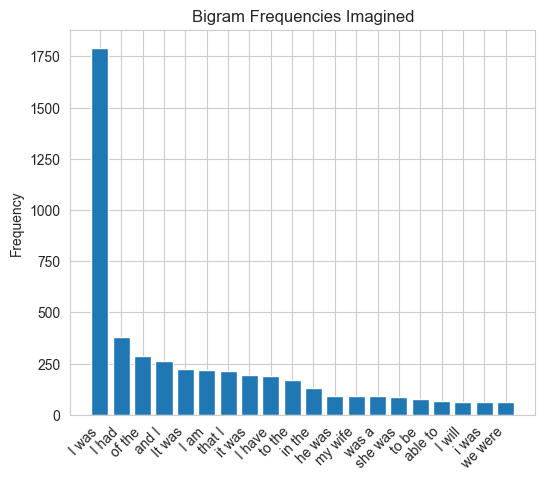

In [613]:
fig, ax = plt.subplots()

ax.bar(list(img_freq_top_20.keys()), list(img_freq_top_20.values()))

# Customize the plot
# ax.set_xlabel('Bigram-Imagined')
ax.set_ylabel('Frequency')
ax.set_title('Bigram Frequencies Imagined')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

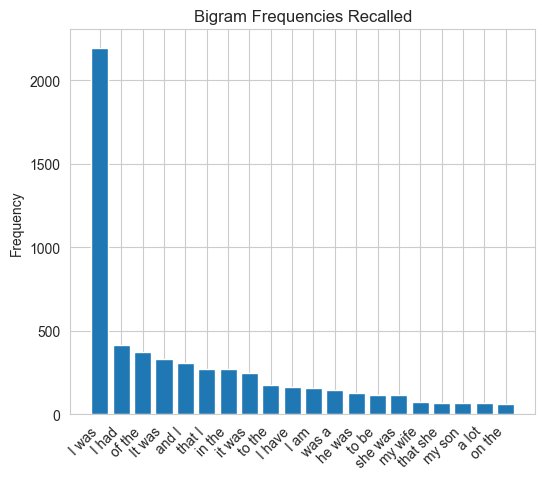

In [614]:
fig, ax = plt.subplots()

ax.bar(list(recall_freq_top_20.keys()), list(recall_freq_top_20.values()))

# Customize the plot
# ax.set_xlabel('Bigram-Recall')
ax.set_ylabel('Frequency')
ax.set_title('Bigram Frequencies Recalled')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [487]:
sum_verb_count = df_recall.groupby('common_verb')['verb_count'].sum().to_dict()
# sum_verb_count

{'have': 3208, 'go': 2033, 'get': 1307, 'feel': 506, 'see': 419, 'do': 388, 'make': 270, 'take': 241, 'know': 219, 'move': 163, 'think': 161, 'start': 147, 'say': 140, 'tell': 122, 'come': 119, 'find': 116, 'play': 108, 'want': 108, 'work': 107, 'be': 91}


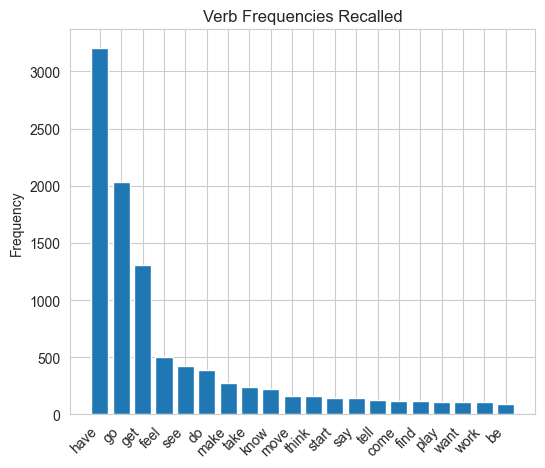

In [615]:
# frequency_map_3 = {}

# for row in df_recall['common_verb']:
#     if row not in frequency_map_3:
#         frequency_map_3[row] = 1
#     else:
#         frequency_map_3[row] += 1
        
# print(frequency_map_3)
recall_verb_count = df_recall.groupby('common_verb')['verb_count'].sum().to_dict()
recall_verb_map = dict(sorted(recall_verb_count.items(), key=lambda x: x[1], reverse=True))
recall_verb_20 = dict(itertools.islice(recall_verb_map.items(), 20)) 

print(recall_verb_20)

fig, ax = plt.subplots()

ax.bar(list(recall_verb_20.keys()), list(recall_verb_20.values()))

# Customize the plot
# ax.set_xlabel('Verb-Recall')
ax.set_ylabel('Frequency')
ax.set_title('Verb Frequencies Recalled')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

{'have': 2951, 'go': 1605, 'get': 1323, 'feel': 410, 'see': 409, 'know': 339, 'do': 327, 'think': 284, 'make': 250, 'take': 222, 'want': 181, 'tell': 180, 'say': 143, 'start': 112, 'come': 97, 'happen': 85, 'help': 85, 'meet': 82, 'look': 67, 'find': 64}


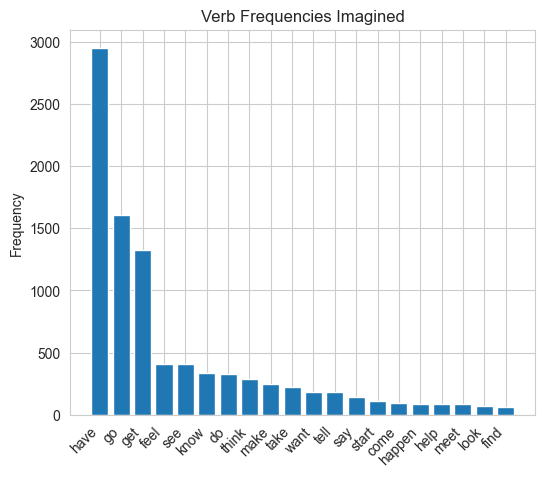

In [616]:
# frequency_map_4 = {}

# for row in df_imagine['common_verb']:
#     if row not in frequency_map_4:
#         frequency_map_4[row] = 1
#     else:
#         frequency_map_4[row] += 1
        
# print(frequency_map_3)
img_verb_count = df_imagine.groupby('common_verb')['verb_count'].sum().to_dict()
img_verb_map = dict(sorted(img_verb_count.items(), key=lambda x: x[1], reverse=True))
img_verb_20 = dict(itertools.islice(img_verb_map.items(), 20)) 

print(img_verb_20)

fig, ax = plt.subplots()

ax.bar(list(img_verb_20.keys()), list(img_verb_20.values()))

# Customize the plot
#ax.set_xlabel('Verb-Imaginary')
ax.set_ylabel('Frequency')
ax.set_title('Verb Frequencies Imagined')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

**Modal Verbs**

In [490]:
df_1['modal_verb_freq'] = [None]*len(df_1['story'])

In [491]:
# modal_frequencies = {'can': 5, 'will': 10, 'should': 3}
# df_1['modal_frequencies'] = df_1['modal_verb'].apply(lambda x: modal_frequencies if x is None else None)
# df_1['modal_verb'][0]=(modal_frequencies)
# df_1.head()

In [492]:
# modal_frequencies = {}
# df_1['modal_frequencies'] = df_1['modal_verb'].apply(lambda x: modal_frequencies if x is None else None)
# df_1.head()

In [493]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

modal_verbs = ["can", "could", "may", "might", "shall", "should", "will", "would", "must"]

def get_modal_verbs(text):
    words = text.lower().split()
    return [word for word in words if word in modal_verbs]

# def calculate_modal_frequencies(modal_verbs):
#     return dict(Counter(modal_verbs))

def calculate_modal_frequencies(text):
    # Load SpaCy model
    
    # Process the text with SpaCy
    doc = nlp(text)

    # List of modal verbs
    # modal_verbs = ["can", "could", "may", "might", "shall", "should", "will", "would", "must"]

    # Extract modal verbs and count their occurrences
    modal_counts = Counter(token.text.lower() for token in doc if token.text.lower() in modal_verbs)

    return dict(modal_counts)

In [494]:
for i in range(len(df_1['story'])):
    #print(df_1['story'][i])
    # modal_verbs = get_modal_verbs(df_1['story'][i])
    modal_frequencies = calculate_modal_frequencies(df_1['story'][i])
    # most_frequent_modal = get_most_frequent_modal(modal_frequencies)
    df_1.at[i, 'modal_verb_freq'] = modal_frequencies

In [495]:
df_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq
0,0,0,0,0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2}
1,1,1,1,2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}"
2,2,2,2,4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}"
3,3,3,3,6,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}"
4,4,4,4,8,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}"


In [496]:
df_1.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'sequentiality', 'topic_output', 'contextual',
       'ner_count', 'type', 'common_verb', 'verb_count', 'common_bigram',
       'modal_verb_freq'],
      dtype='object')

In [497]:
# df_1['story'][11]

In [498]:
df_1 = df_1.drop(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)
#df_1 = df_1.drop([ 'Unnamed: 0.1'], axis=1)
df_1.columns

Index(['AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'sequentiality', 'topic_output', 'contextual',
       'ner_count', 'type', 'common_verb', 'verb_count', 'common_bigram',
       'modal_verb_freq'],
      dtype='object')

In [499]:
# df_1.to_csv('test_1.csv', index=False)

In [500]:
df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2}
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}"
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}"
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}"
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}"


In [501]:
import matplotlib.pyplot as plt
import itertools
from itertools import islice

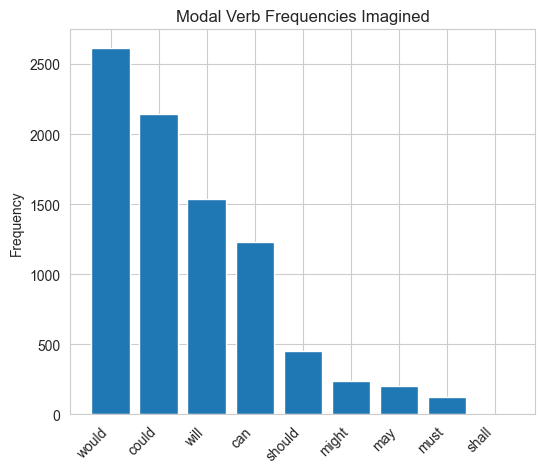

In [649]:
df_imagine = df_1.iloc[:2756]
df_imagine = df_imagine.sample(frac=1).reset_index(drop=True)
# df_imagine.head()
frequency_map = {}

for row in df_imagine['modal_verb_freq']:
    if row:
        for key, value in row.items():
            if key not in frequency_map:
                frequency_map[key] = value
            else:
                frequency_map[key] += value
        
fig, ax = plt.subplots()

sorted_frequency_map = dict(sorted(frequency_map.items(), key=lambda item: item[1], reverse=True))

ax.bar(list(sorted_frequency_map.keys()), list(sorted_frequency_map.values()))

# Customize the plot
# ax.set_xlabel('Modal-Verbs-Imagined')
ax.set_ylabel('Frequency')
ax.set_title('Modal Verb Frequencies Imagined')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

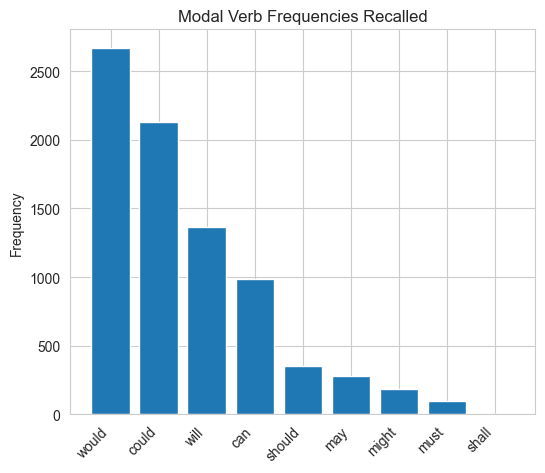

In [650]:
df_recall = df_1.iloc[2756:5535]
df_recall = df_recall.sample(frac=1).reset_index(drop=True)

frequency_map_2 = {}

for row in df_recall['modal_verb_freq']:
    if row:
        for key, value in row.items():
            if key not in frequency_map_2:
                frequency_map_2[key] = value
            else:
                frequency_map_2[key] += value
                
                
fig, ax = plt.subplots()
sorted_frequency_map_2 = dict(sorted(frequency_map_2.items(), key=lambda item: item[1], reverse=True))

ax.bar(list(sorted_frequency_map_2.keys()), list(sorted_frequency_map_2.values()))

# Customize the plot
# ax.set_xlabel('Modal-Verbs-Recall')
ax.set_ylabel('Frequency')
ax.set_title('Modal Verb Frequencies Recalled')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [504]:
frequency_map

{'would': 2616,
 'should': 452,
 'will': 1534,
 'can': 1233,
 'could': 2146,
 'must': 127,
 'may': 204,
 'might': 239,
 'shall': 4}

In [505]:
frequency_map_2

{'could': 2128,
 'would': 2671,
 'will': 1365,
 'can': 987,
 'should': 352,
 'may': 281,
 'might': 183,
 'must': 94,
 'shall': 6}

In [506]:
df_imagine.shape

(2756, 32)

**Statement Type**

In [507]:
def get_sentence_type(sentence):
    doc = nlp(sentence)

    # List of speculative verbs
    speculative_verbs = ["might", "could", "may", "can"]

    # Check for speculative verbs in the sentence
    if any(verb in [token.text.lower() for token in doc] for verb in speculative_verbs):
        return "Speculative"
    else:
        return "Declarative"


def count_sentence_types(text):
    doc = nlp(text)
    sentence_types = [get_sentence_type(sent.text) for sent in doc.sents]
    
    # Count the number of each sentence type
    counts = {"Speculative": sentence_types.count("Speculative"), "Declarative": sentence_types.count("Declarative")}
    
    return counts

In [508]:
import spacy
spec_verbs = ["might", "could", "may", "can", "probably", "definitely", "should be", "shall be", "would", "should have", "shall have"]

def contains_speculative_word(sentence, spec_words):
    doc = nlp(sentence.lower())
    for word in spec_words:
        if " " in word:
            # Check for multi-word expressions
            if all(part in [token.text.lower() for token in doc] for part in word.split()):
                return True
        elif word in [token.text.lower() for token in doc]:
            return True
    return False

def count_sentence_types(text, spec_words):
    doc = nlp(text)
    speculative_count = 0
    declarative_count = 0

    for sent in doc.sents:
        if contains_speculative_word(sent.text, spec_words):
            speculative_count += 1
        else:
            declarative_count += 1

    counts = {"Speculative": speculative_count, "Declarative": declarative_count}
    prob = speculative_count / (speculative_count + declarative_count)
    return counts, prob

In [509]:
df_1['speculative_stat'] = [None]*len(df_1['story'])
df_1['speculative_prob'] = [0]*len(df_1['story'])

In [510]:
for i in range(len(df_1['story'])):
    count, probs = count_sentence_types(df_1['story'][i], spec_verbs)
    df_1.at[i, 'speculative_stat'] = count
    df_1.loc[i, 'speculative_prob'] = probs

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_90044/1078285476.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.19047619047619047' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'speculative_prob'] = probs


In [511]:
df_1.to_csv("save_this.csv", index=False)

In [512]:
df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667


In [646]:
rcParams['figure.figsize'] = 6,5

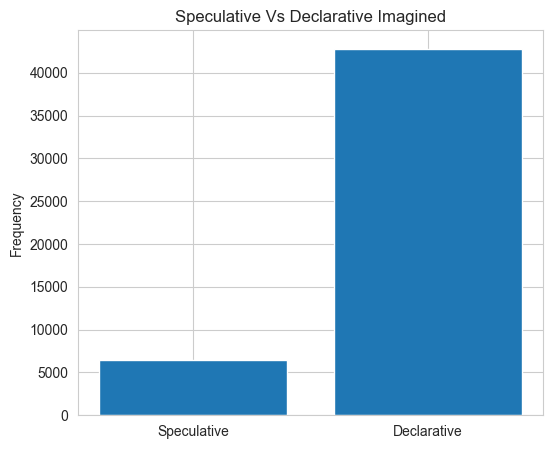

In [647]:
df_imagine = df_1.iloc[:2756]
df_imagine = df_imagine.sample(frac=1).reset_index(drop=True)
# df_imagine.head()
frequency_map = {}

for row in df_imagine['speculative_stat']:
    if row:
        for key, value in row.items():
            if key not in frequency_map:
                frequency_map[key] = value
            else:
                frequency_map[key] += value
        
fig, ax = plt.subplots()

ax.bar(list(frequency_map.keys()), list(frequency_map.values()))

# Customize the plot
# ax.set_xlabel('Speculative Vs Declarative-Imagined')
ax.set_ylabel('Frequency')
ax.set_title('Speculative Vs Declarative Imagined')

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [514]:
frequency_map

{'Speculative': 6422, 'Declarative': 42819}

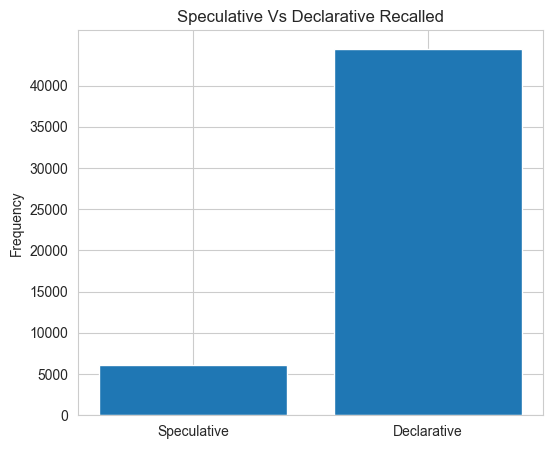

In [648]:
df_recall = df_1.iloc[2756:5535]
df_recall = df_recall.sample(frac=1).reset_index(drop=True)

frequency_map_2 = {}

for row in df_recall['speculative_stat']:
    if row:
        for key, value in row.items():
            if key not in frequency_map_2:
                frequency_map_2[key] = value
            else:
                frequency_map_2[key] += value
                
                
fig, ax = plt.subplots()

ax.bar(list(frequency_map_2.keys()), list(frequency_map_2.values()))

# Customize the plot
#ax.set_xlabel('SpeculativeVsDeclarative-Recall')
# plt.yticks([i for i in range(0, len(frequency_map_2.values()), 5000)])
tick_interval = 5000  # Adjust this value based on your preference
yticks = range(0, max(frequency_map_2.values()) + 1, tick_interval)
plt.yticks(yticks)
ax.set_ylabel('Frequency')
ax.set_title('Speculative Vs Declarative Recalled')

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [516]:
frequency_map_2

{'Speculative': 6135, 'Declarative': 44492}

In [517]:
df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667


In [518]:
df_tr = df_1.iloc[:5535]
df_tr = df_tr.sample(frac=1).reset_index(drop=True)

In [519]:
df_tr.shape

(5535, 34)

In [520]:
df_tr.drop(df_tr[df_tr['speculative_prob'] == 0].index, inplace=True)

In [521]:
from sklearn.model_selection import train_test_split
X = df_tr.loc[:, ["speculative_prob", "ner_count", "sequentiality", "stressful"]]
Y = df_tr.loc[:, ["type"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [522]:
x_train.shape

(3680, 4)

In [523]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
model.fit(x_train, y_train)
preds = model.predict(x_test)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [524]:
yz = list(y_test['type'])

In [525]:
tot = len(yz)
acc = 0
for i in range(len(yz)):
    if preds[i] == yz[i]:
        acc += 1

print(acc/tot)

0.6347826086956522


In [526]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
preds_lr = logistic_regression.predict(x_test)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [527]:
accuracy = accuracy_score(y_test, preds_lr)

In [528]:
accuracy

0.6423913043478261

In [529]:
df_1.to_csv("some_addn.csv", index=False)

In [530]:
df_1.shape[0]

6854

In [531]:
df_1['temporal_count'] = [0] * df_1.shape[0]

In [532]:
nlp = spacy.load("en_core_web_sm")
def count_temporal_references(text):
    # Load SpaCy model
    # Process the text with SpaCy
    doc = nlp(text)

    # Define temporal reference tags
    temporal_tags = {"DATE", "TIME", "TIMESTAMP", "TEMPORAL", "ORDINAL"}

    # Count temporal references
    temporal_count = sum(1 for token in doc if token.ent_type_ in temporal_tags or token.pos_ == "NUM" or token.text.lower() in {"today", "yesterday", "tomorrow"})

    return temporal_count

In [533]:
for i in range(df_1.shape[0]):
    temp_count = count_temporal_references(df_1['story'][i])
    df_1.loc[i, 'temporal_count'] = temp_count

In [534]:
df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,"[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,"[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,"[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,"[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,"[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24


In [535]:
sum_group = df_1.groupby('type')['temporal_count'].mean().to_dict()
sum_group

{0: 9.54499274310595, 1: 12.814681540122345, 2: 10.187263078089462}

In [536]:
df_tr = df_1.iloc[:5535]
df_tr = df_tr.sample(frac=1).reset_index(drop=True)
df_tr.shape

(5535, 35)

In [537]:
df_tr.drop(df_tr[df_tr['speculative_prob'] == 0].index, inplace=True)

In [538]:
from sklearn.model_selection import train_test_split
X = df_tr.loc[:, ["temporal_count", "speculative_prob", "ner_count", "sequentiality", "stressful"]]
Y = df_tr.loc[:, ["type"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
x_train.shape

(3680, 5)

In [539]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0)
model.fit(x_train, y_train)
preds = model.predict(x_test)

yz = list(y_test['type'])

tot = len(yz)
acc = 0
for i in range(len(yz)):
    if preds[i] == yz[i]:
        acc += 1

print(acc/tot)

0.6195652173913043


/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [540]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
preds_lr = logistic_regression.predict(x_test)

accuracy = accuracy_score(y_test, preds_lr)

accuracy

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.625

In [541]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6239130434782608

In [542]:
def yPred(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    return acc

In [543]:
# from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Example usage
classifier = [XGBClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

for i in range(len(classifier)):
    accuracy = yPred(classifier[i])
    print("Accuracy: ", accuracy)


Accuracy:  0.6021739130434782
Accuracy:  0.566304347826087
Accuracy:  0.5521739130434783


/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [544]:
X_train_combined, X_temp, y_train_combined, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [545]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [546]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_combined, y_train_combined)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.6275362318840579


In [547]:
# best_model

In [548]:
# y_train.shape

In [549]:
best_xgb = XGBClassifier(**best_model.get_params())
best_xgb.fit(X_train_combined, y_train_combined)

y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6333333333333333

Grid Search for SVC, Random Forest and Linear Regression

In [550]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.1, 1, 10]}


In [551]:
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_combined, y_train_combined)


print("Best Parameters:", grid_search.best_params_)
best_svc = grid_search.best_estimator_
y_val_pred = best_svc.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A colu

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Validation Accuracy: 0.6463768115942029


In [552]:
y_test_pred = best_svc.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.6579710144927536


In [553]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_combined, y_train_combined)


print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_val_pred = best_svc.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vec

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [554]:
y_test_pred = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.618840579710145


In [555]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [556]:
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_combined, y_train_combined)


print("Best Parameters:", grid_search.best_params_)
best_log = grid_search.best_estimator_
y_val_pred = best_log.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A colu

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A colu

In [557]:
y_test_pred = best_log.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.6463768115942029


In [558]:
df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,"[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,"[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,"[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,"[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,"[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24


In [559]:
# df_1.to_csv('final.csv', index=False)

In [560]:
sum_group = df_1.groupby('common_verb')['verb_count'].sum().to_dict()
sum_group

{'accept': 9,
 'accomplish': 2,
 'achieve': 10,
 'act': 2,
 'adopt': 34,
 'agree': 3,
 'amend': 2,
 'appear': 6,
 'apply': 25,
 'approach': 1,
 'argue': 10,
 'arrange': 15,
 'arrive': 33,
 'ask': 63,
 'attack': 3,
 'attend': 51,
 'avoid': 2,
 'back': 3,
 'bake': 4,
 'baptize': 4,
 'be': 185,
 'bear': 18,
 'become': 36,
 'begin': 62,
 'believe': 17,
 'book': 3,
 'break': 10,
 'bring': 16,
 'build': 3,
 'bump': 5,
 'burn': 8,
 'buy': 62,
 'call': 64,
 'care': 8,
 'catch': 20,
 'celebrate': 39,
 'certify': 3,
 'change': 39,
 'chat': 3,
 'cheat': 15,
 'check': 28,
 'choose': 12,
 'chop': 5,
 'clean': 9,
 'close': 3,
 'come': 265,
 'communicate': 3,
 'complete': 3,
 'con': 2,
 'confront': 3,
 'continue': 4,
 'cost': 2,
 'cramp': 3,
 'crawl': 17,
 'cross': 3,
 'cry': 31,
 'cut': 12,
 'dance': 6,
 'dart': 2,
 'date': 24,
 'deal': 7,
 'decide': 132,
 'deserve': 3,
 'determine': 4,
 'diagnose': 8,
 'die': 58,
 'dilate': 2,
 'do': 964,
 'donate': 3,
 'dress': 3,
 'drink': 6,
 'drive': 121,
 'dro

In [561]:
mean_group = df_1.groupby('type')['verb_count'].mean().to_dict()
mean_group

{0: 4.066400580551524, 1: 4.468873695573947, 2: 4.435936315390447}

Average Verb Count

In [562]:
df_tr_new = df_1.iloc[:5535]
df_tr_new = df_tr_new.sample(frac=1).reset_index(drop=True)
df_tr_new.shape

(5535, 35)

In [563]:
X = df_tr_new.loc[:, ["verb_count"]]
Y = df_tr_new.loc[:, ["type"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
x_train.shape

(4428, 1)

In [564]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
preds_lr = logistic_regression.predict(x_test)

accuracy = accuracy_score(y_test, preds_lr)

accuracy

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5275519421860885

In [565]:
best_svc

SVC(C=10, kernel='linear')

In [566]:
df_tr = df_1.iloc[:5535]
df_tr = df_tr.sample(frac=1).reset_index(drop=True)
df_tr.shape

(5535, 35)

In [567]:
df_tr.drop(df_tr[df_tr['speculative_prob'] == 0].index, inplace=True)

X = df_tr.loc[:, ["temporal_count", "speculative_prob", "ner_count", "sequentiality", "stressful"]]
Y = df_tr.loc[:, ["type"]]

In [568]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
bagging_classifier = BaggingClassifier(best_svc, n_estimators=10, random_state=42)

bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.6076086956521739


In [569]:
best_log

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [570]:
bagging_classifier_2 = BaggingClassifier(best_log, n_estimators=10, random_state=42)

bagging_classifier_2.fit(X_train, y_train)
y_pred = bagging_classifier_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Logistic Bagging:", accuracy)

Test Accuracy with Logistic Bagging: 0.6010869565217392


/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [571]:
best_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [572]:
bagging_classifier_3 = BaggingClassifier(best_rf, n_estimators=10, random_state=42)

bagging_classifier_3.fit(X_train, y_train)
y_pred = bagging_classifier_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Logistic Bagging:", accuracy)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy with Logistic Bagging: 0.625


In [573]:
types = df_tr.groupby('type').size()
types

type
0    2326
1    2274
dtype: int64

In [574]:
types_2 = y_test.groupby('type').size()
types_2

type
0    482
1    438
dtype: int64

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
bagging_classifier_4 = BaggingClassifier(best_xgb, n_estimators=10, random_state=42)

bagging_classifier_4.fit(X_train, y_train)
y_pred = bagging_classifier_4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [576]:
accuracy

0.6217391304347826

MORE FEATURES
1. Affect words

In [577]:
df_1.drop(df_1[df_1['type'] == 2].index, inplace=True)
df_1.shape

(5535, 35)

In [578]:
affect_words = ['happy', 'joyful', 'content', 'please', 'ecstatic', 'elated', 'satisfied', 'sad', 'unhappy', 'sorrowful', 'mournful', 'melancholy', 'depress', 'gloomy', 'angry', 'irritable', 'frustrate', 'annoy', 'enrage', 'furious', 'agitate', 'excite', 'enthusiastic', 'eager', 'thrill', 'animate', 'stimulate', 'passionate', 'fearful', 'anxious', 'nervous', 'terrify', 'panic', 'alarm', 'worried', 'surprised', 'amaze', 'astonish', 'shock', 'startle', 'daze', 'confuse', 'disgust', 'repulse', 'revolt', 'nauseate', 'abhorrent', 'offend', 'appal', 'calm', 'relax', 'peaceful', 'serene', 'compose', 'tranquil', 'soothe', 'tender', 'love', 'affectionate', 'compassionate', 'warm', 'care', 'gentle', 'hopeful', 'optimistic', 'encourage', 'inspire', 'confident', 'uplift', 'positive', 'grateful', 'thankful', 'appreciative', 'bless', 'content', 'satisfied', 'fulfil', 'nice', 'incredible' ,'cry', 'beautiful'
                'surreal', 'important']


def calculate_probability_of_affect_words(story):
    # Process the story text using spaCy
    doc = nlp(story)

    # Lemmatize and tokenize the story into words
    words = [token.lemma_.lower() for token in doc if token.is_alpha]

    # Count the occurrences of affect words and total words
    affect_word_count = sum(word in affect_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of affect words
    probability_of_affect_words = affect_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_affect_words



In [579]:
df_1['affect_words'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_affect_words(df_1['story'][i])
    # print(count)
    # if i > 10:
    #     break
    df_1.loc[i, 'affect_words'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_90044/2839965391.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.014778325123152709' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'affect_words'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.014778
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.007491
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000


2. Social Words

In [580]:
social_words_list = ['he', 'she', 'her', 'him', 'they', 'husband', 'wife', 'son', 'daughter', 'family', 'friend', 'girlfriend', 'boyfriend', 'brother',
                     'sister', 'niece', 'nephew', 'mother', 'father', 'friends', 'families', 'them', 'we']

def calculate_probability_of_social_words(story, social_words):
    # Process the story text using spaCy
    doc = nlp(story)

    # Tokenize the story into words, removing stop words
    words = [token.text.lower() for token in doc if token.is_alpha]

    # Count the occurrences of social words and total words
    social_word_count = sum(word in social_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of social words
    probability_of_social_words = social_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_social_words


In [581]:
df_1['social_words'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_social_words(df_1['story'][i], social_words_list)
    df_1.loc[i, 'social_words'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_90044/1575429159.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.07389162561576355' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'social_words'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.014778,0.073892
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.007491,0.063670
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169


3. Prepositions

In [582]:
def calculate_probability_of_prepositions(story):
    # Process the story text using spaCy
    doc = nlp(story)

    # Tokenize the story into words
    words = [token.text.lower() for token in doc]

    # Count the occurrences of prepositions and total words
    preposition_count = sum(token.pos_ == 'ADP' for token in doc)
    total_word_count = len(words)

    # Calculate the probability of prepositions
    probability_of_prepositions = preposition_count / total_word_count if total_word_count > 0 else 0

    return probability_of_prepositions

In [583]:
df_1['preposition_probs'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_prepositions(df_1['story'][i])
    df_1.loc[i, 'preposition_probs'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_90044/3891540866.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.09012875536480687' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'preposition_probs'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words,preposition_probs
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.014778,0.073892,0.090129
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.007491,0.063670,0.085616
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691,0.082873
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406,0.097345
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169,0.101928


In [584]:
df_1['story'][2]

"About a month ago I went to burning man. I was having a hard time in my life and felt like I needed a break. So I went to burning man. I had a lot of fun and met some friends. But now after it is done I'm having financial problems. My bills keep coming and I owe people. Including my new friends. Everyday bills come and new bills come in the mail. I always look at the caller ID now on my phone, just in case. if I owe them money I don't want to answer. Everyday it feels like I made a mistake by letting myself spend all my money. I have to work extra hours but they won't give me any. So the bills just keep piling up and I need to search around for a second job. I barely have enough time for the first one. I really should have thought about what would have happened in advance."

In [585]:
df_tr = df_1.iloc[:5535]
df_tr = df_tr.sample(frac=1).reset_index(drop=True)
df_tr.shape

(5535, 38)

In [586]:
df_tr.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words,preposition_probs
0,3QY7M81QH88VD92TS5UGZQOM1EGK7C,783,MR4A8VFH,30.0,man,middleEastern,1.0,2.0,NaN,5.0,...,have,6,"[((that, I), 7), ((I, had), 3), ((savings, acc...","{'would': 6, 'can': 1}","{'Speculative': 5, 'Declarative': 16}",0.238095,7,0.010776,0.028017,0.084980
1,3ZV9H2YQQET47QVNF7ATAK62H5D3W4,1604,9753AB9Y,35.0,woman,white,1.0,3.0,NaN,5.0,...,get,4,"[((a, cave), 4), ((the, cave), 3), ((decided, ...","{'could': 1, 'would': 2, 'will': 1}","{'Speculative': 2, 'Declarative': 15}",0.117647,8,0.004695,0.070423,0.082353
2,3N4BPTXIO9EXBKEP5DNR9I26IUVKUF,5757,TWQGI86D,35.0,man,hisp,2.0,2.0,NaN,2.0,...,bring,2,"[((together, We), 3), ((Uncle, Ronnie), 2), ((...",{'will': 1},"{'Speculative': 0, 'Declarative': 15}",0.000000,5,0.008621,0.068966,0.058394
3,3R5F3LQFV36XNATE9SESXRYUXZ7ZOJ,1202,35K3EDHT,18.0,man,black,2.0,5.0,2.0,4.0,...,have,4,"[((the, game), 5), ((I, was), 4), ((and, I), 3)]",{'could': 1},"{'Speculative': 2, 'Declarative': 15}",0.117647,7,0.006873,0.010309,0.082803
4,3MHW492WW1ZSEN3SVFACKHWTJI7MV5,579,4E7X602H,30.0,man,white,1.0,1.0,NaN,2.0,...,feel,2,"[((I, was), 2), ((I, ca), 2), ((a, lot), 2)]","{'could': 1, 'will': 2}","{'Speculative': 2, 'Declarative': 13}",0.133333,3,0.014286,0.021429,0.080247


In [587]:
#df_tr.drop(df_tr[df_tr['speculative_prob'] == 0].index, inplace=True)
#
# X = df_tr.loc[:, ["temporal_count", "speculative_prob", "ner_count", "sequentiality", "stressful" , "social_words", "preposition_probs", "affect_words", "perceptual_probs", "cognitive_word_probs"]]
# Y = df_tr.loc[:, ["type"]]
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [588]:
# bagging_classifier_3 = BaggingClassifier(best_rf, n_estimators=10, random_state=42)
#
# bagging_classifier_3.fit(X_train, y_train)
# y_pred = bagging_classifier_3.predict(X_test)
#
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy with Logistic Bagging:", accuracy)

In [589]:
perceptual_words = [
    'see', 'look', 'view', 'watch', 'observe', 'notice', 'perceive', 'discern', 'recognize',
    'hear', 'listen', 'auditory', 'sound', 'smell', 'olfactory', 'taste', 'gustatory',
    'touch', 'tactile', 'feel', 'sensation', 'sensory', 'experience', 'imagine', 'visualize',
    'picture', 'dream', 'fantasize', 'envision', 'recall'
]

def calculate_probability_of_perceptual_words(story, perceptual_words):
    # Process the story text using spaCy
    doc = nlp(story)

    # Lemmatize and tokenize the story into words
    words = [token.lemma_.lower() for token in doc if token.is_alpha]

    # Count the occurrences of perceptual words and total words
    perceptual_word_count = sum(word in perceptual_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of perceptual words
    probability_of_perceptual_words = perceptual_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_perceptual_words

In [590]:
df_1['perceptual_probs'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_perceptual_words(df_1['story'][i], perceptual_words)
    df_1.loc[i, 'perceptual_probs'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_90044/1710636433.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0049261083743842365' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'perceptual_probs'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words,preposition_probs,perceptual_probs
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.014778,0.073892,0.090129,0.004926
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.007491,0.063670,0.085616,0.018727
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691,0.082873,0.018519
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406,0.097345,0.009901
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169,0.101928,0.024096


In [591]:
cause_words = [
    'because', 'since', 'due to', 'as a result', 'thus', 'therefore', 'consequently', 'so', 'for this reason',
    'trigger', 'cause', 'result in', 'lead to', 'produce', 'generate', 'bring about', 'create', 'induce',
    'prompt', 'instigate', 'incite', 'stimulate', 'provoke', 'occasion', 'originate', 'motivate', 'spur', 'influence'
]

def calculate_probability_of_cause_words(story, cause_words):
    # Process the story text using spaCy
    doc = nlp(story)

    # Lemmatize and tokenize the story into words
    words = [token.lemma_.lower() for token in doc if token.is_alpha]

    # Count the occurrences of cause words and total words
    cause_word_count = sum(word in cause_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of cause words
    probability_of_cause_words = cause_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_cause_words

In [592]:
df_1['cognitive_word_probs'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_cause_words(df_1['story'][i], cause_words)
    df_1.loc[i, 'cognitive_word_probs'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_90044/3121623020.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.019704433497536946' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'cognitive_word_probs'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words,preposition_probs,perceptual_probs,cognitive_word_probs
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.014778,0.073892,0.090129,0.004926,0.019704
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.007491,0.063670,0.085616,0.018727,0.007491
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691,0.082873,0.018519,0.012346
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406,0.097345,0.009901,0.013201
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169,0.101928,0.024096,0.006024


In [593]:
df_1.to_csv("final.csv", index=False)

In [596]:
df_1.columns

Index(['AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'sequentiality', 'topic_output', 'contextual',
       'ner_count', 'type', 'common_verb', 'verb_count', 'common_bigram',
       'modal_verb_freq', 'speculative_stat', 'speculative_prob',
       'temporal_count', 'affect_words', 'social_words', 'preposition_probs',
       'perceptual_probs', 'cognitive_word_probs'],
      dtype='object')

In [597]:
df_tr = df_1.iloc[:5535]
df_tr = df_tr.sample(frac=1).reset_index(drop=True)
df_tr.shape

(5535, 40)

Feature Selection

In [598]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [599]:
X = df_tr.loc[:, ["temporal_count", "speculative_prob", "ner_count", "sequentiality", "stressful" , "social_words", "preposition_probs", "affect_words", "perceptual_probs", "cognitive_word_probs"]]
Y = df_tr.loc[:, ["type"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [600]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


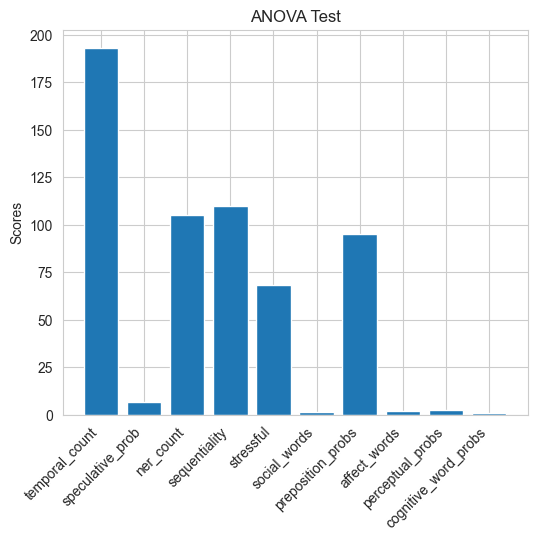

In [625]:
features = ["temporal_count", "speculative_prob", "ner_count", "sequentiality", "stressful" , "social_words", "preposition_probs", "affect_words", "perceptual_probs", "cognitive_word_probs"]
# for i in range(len(fs.scores_)):
#  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([features[i] for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
# plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('ANOVA Test')

plt.show()

In [626]:
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_90044/428646696.py:3: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


In [623]:
# Data Visualisation Settings
%matplotlib inline
rcParams['figure.figsize'] = 6,5
sb.set_style('whitegrid')

In [627]:
corr = X.corr(method='kendall')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'temporal_count'),
  Text(1.5, 0, 'speculative_prob'),
  Text(2.5, 0, 'ner_count'),
  Text(3.5, 0, 'sequentiality'),
  Text(4.5, 0, 'stressful'),
  Text(5.5, 0, 'social_words'),
  Text(6.5, 0, 'preposition_probs'),
  Text(7.5, 0, 'affect_words'),
  Text(8.5, 0, 'perceptual_probs'),
  Text(9.5, 0, 'cognitive_word_probs')])

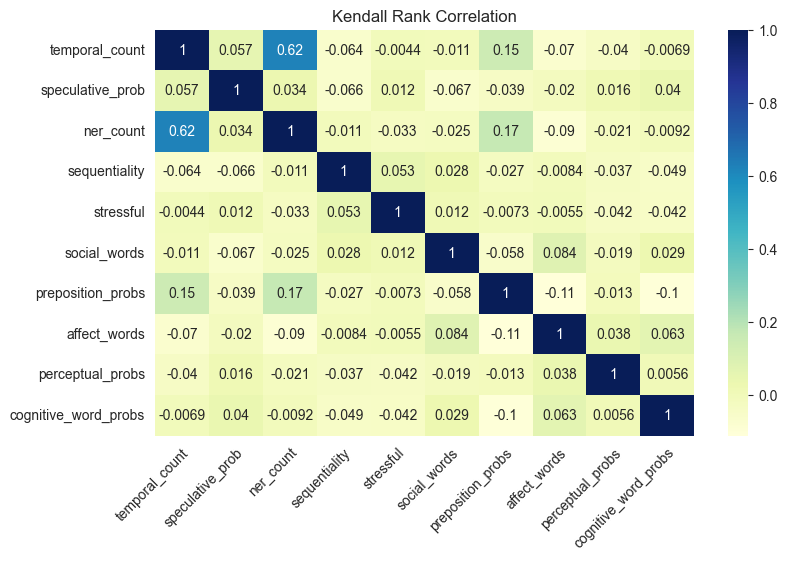

In [641]:
rcParams['figure.figsize'] = 8.7,5.27
ax = sb.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True)
ax.set_title("Kendall Rank Correlation")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

In [ ]:
# using the best features -->
X = df_tr.loc[:, ["temporal_count", "ner_count", "sequentiality", "stressful", "preposition_probs"]]
Y = df_tr.loc[:, ["type"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [ ]:
# try on our best model so far ->
xgb = XGBClassifier(colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5,
                    min_child_weight=1, n_estimators=200, subsample=0.8)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
svc = SVC(C=1, gamma='scale', kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)